# PROJECT - **Unsupervised Anamoly Detection**

---
## DATASET - **Healthcare Providers Data For Anomaly Detection**

---
### NAME - **Shrikar Gaikar**

#### Overview
Healthcare fraud is considered a challenge for many societies. Health care funding that could be spent on medicine, care for the elderly, or emergency room visits is instead lost to fraudulent activities by materialistic practitioners or patients. With rising healthcare costs, healthcare fraud is a major contributor to these increasing healthcare costs.

In [1]:
# Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

Data Loading

In [2]:
import pandas as pd

# Loading the dataset
data = pd.read_csv("/content/Healthcare Providers.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [4]:
# Check the shape of the dataset
data.shape

(100000, 27)

In [5]:
# Check for missing values
data.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

*Inference: This helps us understand the size of the dataset and identify columns with missing values.*

In [6]:
# Summary statistics of the dataset
data.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [7]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [9]:
data.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [10]:
# Step 1: Remove columns related to address, zip codes, etc.
columns_to_remove = [
    'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
    'City of the Provider', 'Zip Code of the Provider', 'State Code of the Provider',
    'Country Code of the Provider'
]
data.drop(columns=columns_to_remove, inplace=True)

In [11]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,Internal Medicine,Y,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,Obstetrics & Gynecology,Y,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,Podiatry,Y,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,Internal Medicine,Y,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,Internal Medicine,Y,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [12]:
# Convert columns with string representations of numbers to numerical values
numeric_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
for col in numeric_columns:
    data[col] = data[col].str.replace(',', '').astype(float)

In [13]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,Internal Medicine,Y,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,Obstetrics & Gynecology,Y,...,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,Podiatry,Y,...,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,Internal Medicine,Y,...,81002,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,Internal Medicine,Y,...,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [14]:
# Merging the name columns into a single column
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')
data['Full Name'] = data['Full Name'].str.strip()

data = data.drop(columns=['Last Name/Organization Name of the Provider',
                          'First Name of the Provider',
                          'Middle Initial of the Provider'])

full_name = data.pop('Full Name')

data.insert(1, 'Full Name', full_name)

In [15]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,I,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,M.D.,F,I,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,I,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,I,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,I,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [16]:
# Imputation of categorical values with mode
data["Credentials of the Provider"] = data["Credentials of the Provider"].fillna(data["Credentials of the Provider"].mode()[0])
data["Gender of the Provider"] = data["Gender of the Provider"].fillna(data["Gender of the Provider"].mode()[0])

In [17]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,I,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,M.D.,F,I,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,I,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,I,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,I,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [18]:
data.isnull().sum()

index                                                       0
Full Name                                                   0
National Provider Identifier                                0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average 

In [19]:
# Step 2: One-hot encode categorical values with binary options
binary_columns = ['Gender of the Provider', 'Medicare Participation Indicator', 'Entity Type of the Provider', 'HCPCS Drug Indicator']
data = pd.get_dummies(data, columns=binary_columns, drop_first=True)

In [20]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Medicare Participation Indicator_Y,Entity Type of the Provider_O,HCPCS Drug Indicator_Y
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,Internal Medicine,F,99223,"Initial hospital inpatient care, typically 70 ...",27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,False,True,False,False
1,3354385,WENDY P JONES,1346202256,M.D.,Obstetrics & Gynecology,O,G0202,"Screening mammography, bilateral (2-view study...",175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,False,True,False,False
2,3001884,RICHARD W DUROCHER,1306820956,DPM,Podiatry,O,99348,"Established patient home visit, typically 25 m...",32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,True,True,False,False
3,7594822,JASPER FULLARD,1770523540,MD,Internal Medicine,O,81002,"Urinalysis, manual test",20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,True,True,False,False
4,746159,ANTHONY E PERROTTI,1073627758,DO,Internal Medicine,O,96372,Injection beneath the skin or into muscle for ...,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,True,True,False,False


In [21]:
# Step 3: Frequency encode categorical values with more than two unique values
frequency_columns = [
    'Full Name', 'Credentials of the Provider', 'Provider Type', 'Place of Service', 'HCPCS Code', 'HCPCS Description'
]
for col in frequency_columns:
    freq_encoding = data[col].value_counts().to_dict()
    data[col] = data[col].map(freq_encoding)

In [22]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Medicare Participation Indicator_Y,Entity Type of the Provider_O,HCPCS Drug Indicator_Y
0,8774979,1,1891106191,32757,11366,38384,1297,1297,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,False,True,False,False
1,3354385,1,1346202256,32757,1028,61616,243,243,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,False,True,False,False
2,3001884,1,1306820956,1330,2027,61616,44,44,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,True,True,False,False
3,7594822,1,1770523540,40083,11366,61616,460,460,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,True,True,False,False
4,746159,1,1073627758,2478,11366,61616,732,732,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,True,True,False,False


In [23]:
# Step 4: Apply Standard Scaler on the encoded dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [24]:
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Save the processed dataset to a new CSV file
scaled_df.to_csv('processed_dataset.csv', index=False)

In [25]:
prep_data = scaled_df

In [26]:
prep_data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Medicare Participation Indicator_Y,Entity Type of the Provider_O,HCPCS Drug Indicator_Y
0,1.361920,-0.092857,1.366960,0.349313,1.336743,-1.266985,0.397579,0.389268,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299,-1.560716,0.01761,-0.210784,-0.257051
1,-0.546996,-0.092857,-0.528945,0.349313,-0.940500,0.789275,-0.439989,-0.450300,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359,-1.560716,0.01761,-0.210784,-0.257051
2,-0.671133,-0.092857,-0.665966,-1.595350,-0.720441,0.789275,-0.598126,-0.608815,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154,0.640731,0.01761,-0.210784,-0.257051
3,0.946316,-0.092857,0.947412,0.802637,1.336743,0.789275,-0.267549,-0.277448,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921,0.640731,0.01761,-0.210784,-0.257051
4,-1.465509,-0.092857,-1.477323,-1.524313,1.336743,0.789275,-0.051402,-0.060785,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800,0.640731,0.01761,-0.210784,-0.257051


## Autoencoders

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [28]:
# Define the Autoencoder Model
input_dim = prep_data.shape[1]
encoding_dim = 32  # Number of neurons in the bottleneck layer

In [29]:
# Define the input layer
input_layer = Input(shape=(input_dim,))

In [30]:
# Define the encoder layers
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(16, activation="relu")(encoder)
encoder = Dense(2, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)

In [31]:
# Define the decoder layers
decoder = Dense(32, activation="relu")(encoder)
decoder = Dense(input_dim, activation="relu")(decoder)

In [32]:
# Combine the encoder and decoder into an autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [33]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dense_3 (Dense)             (None, 16)                48        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 19)                627   

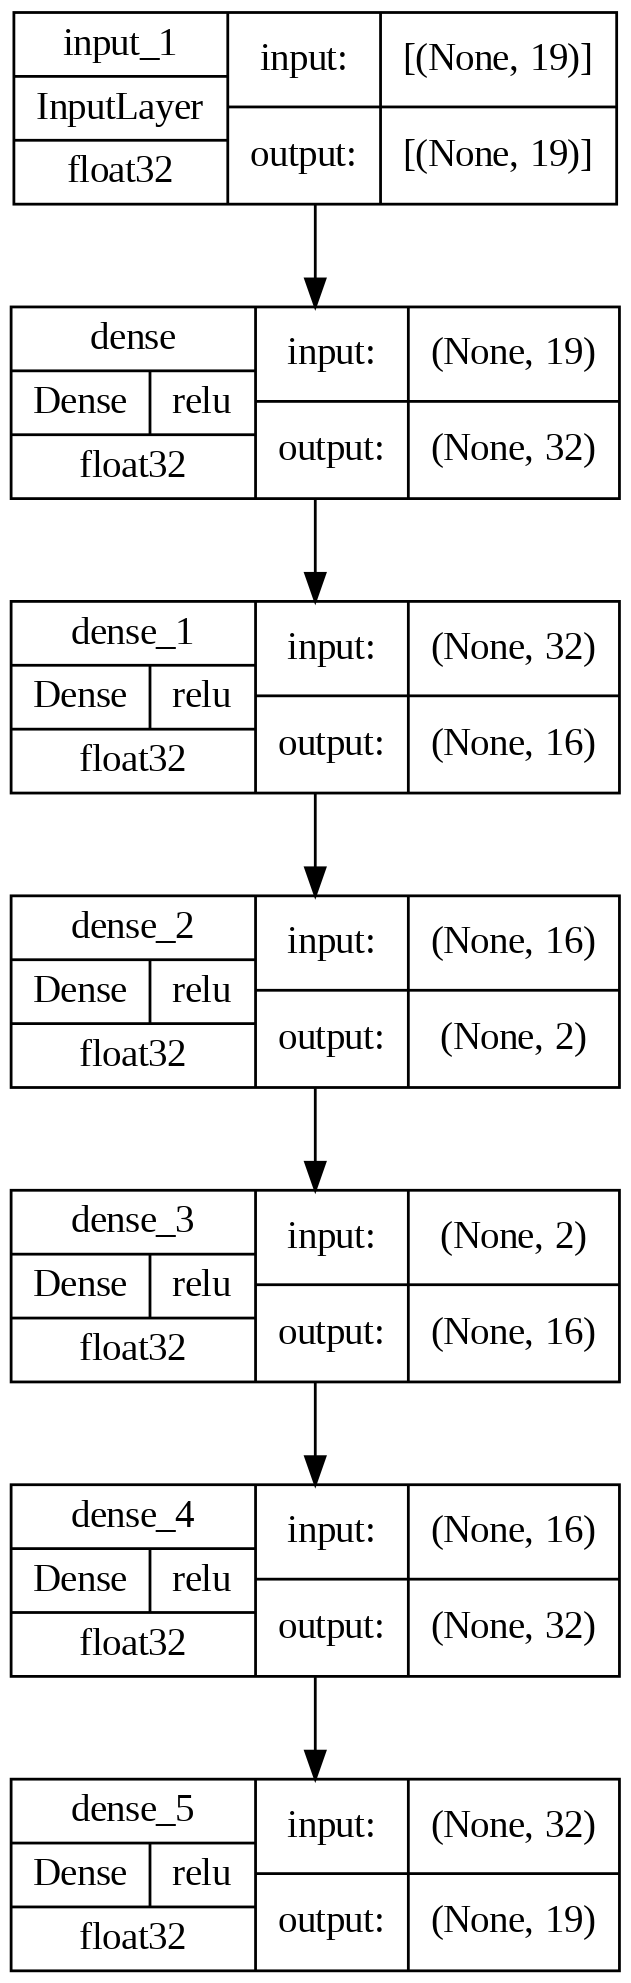

In [35]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file='autoencoder_model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False,
)

In [36]:
# Train the Autoencoder
history = autoencoder.fit(prep_data, prep_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
2500/2500 [==============================] - 13s 4ms/step - loss: 0.7423 - val_loss: 1.0067
Epoch 2/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6696 - val_loss: 0.9780
Epoch 3/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6546 - val_loss: 0.9636
Epoch 4/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6455 - val_loss: 0.9503
Epoch 5/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6378 - val_loss: 0.9602
Epoch 6/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6312 - val_loss: 0.9324
Epoch 7/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6270 - val_loss: 0.9378
Epoch 8/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6222 - val_loss: 0.9395
Epoch 9/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6200 - val_loss: 0.9247
Epoch 10/50
2500/2500 [==============================] - 10s 4ms/step - los

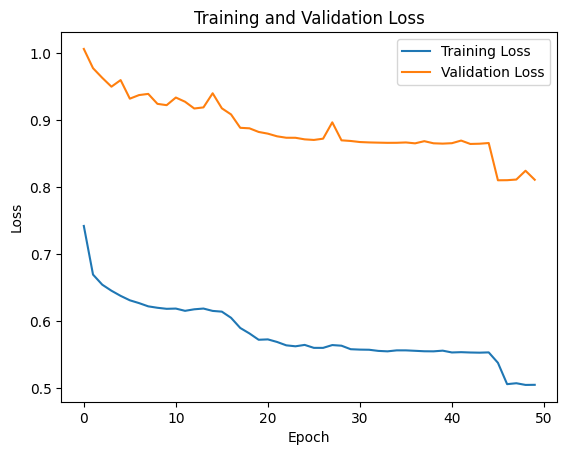

In [37]:
# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
labels = autoencoder.predict(prep_data)
mse = np.mean(np.power(prep_data - labels, 2), axis=1)

3125/3125 [==============================] - 6s 2ms/step


In [39]:
# Anomaly Detection
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

print(f"Threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Threshold: 1.363107010093677
Number of anomalies detected: 1000


In [40]:
data['Anomaly'] = anomalies

In [41]:
data['Anomaly'] = data['Anomaly'].apply(lambda x: 1 if x == True else 0)

In [42]:
list(data['Anomaly']).count(1)

1000

In [43]:
list(data['Anomaly']).count(0)

99000

In [44]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Medicare Participation Indicator_Y,Entity Type of the Provider_O,HCPCS Drug Indicator_Y,Anomaly
0,8774979,1,1891106191,32757,11366,38384,1297,1297,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,False,True,False,False,0
1,3354385,1,1346202256,32757,1028,61616,243,243,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,False,True,False,False,0
2,3001884,1,1306820956,1330,2027,61616,44,44,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,True,True,False,False,0
3,7594822,1,1770523540,40083,11366,61616,460,460,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,True,True,False,False,0
4,746159,1,1073627758,2478,11366,61616,732,732,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,True,True,False,False,0


In [45]:
# Add the MSE values to the dataframe for visualization
data['MSE'] = mse

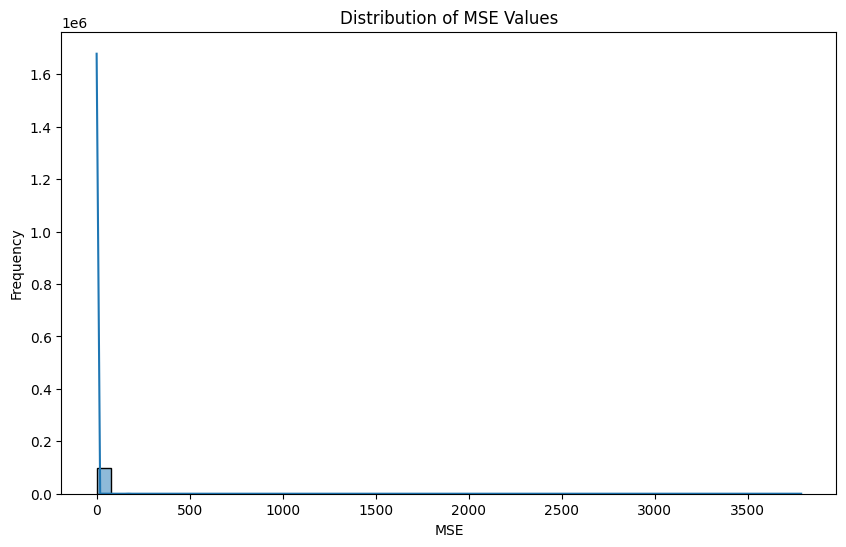

In [46]:
# Plot distribution of MSE values
plt.figure(figsize=(10, 6))
sns.histplot(data['MSE'], bins=50, kde=True)
plt.title('Distribution of MSE Values')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.show()

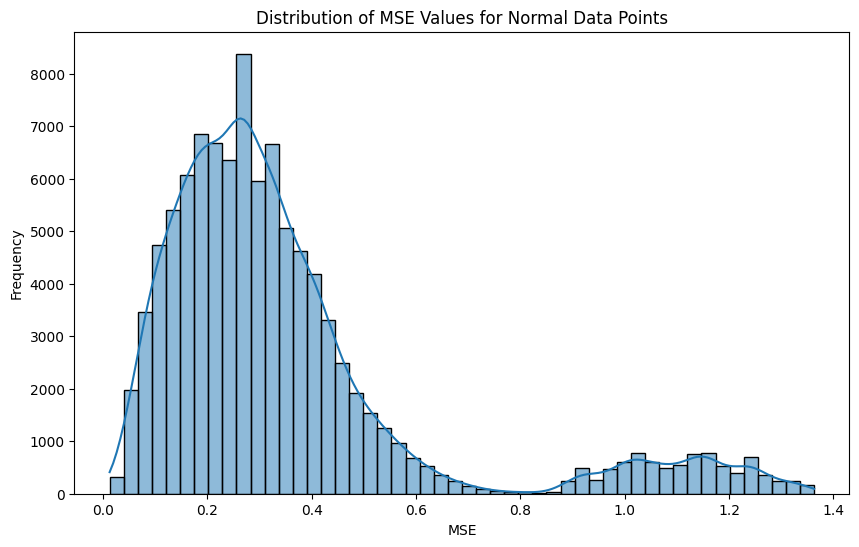

In [47]:
# Plot distribution of MSE values for normal data points
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Anomaly'] == 0]['MSE'], bins=50, kde=True)
plt.title('Distribution of MSE Values for Normal Data Points')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.show()

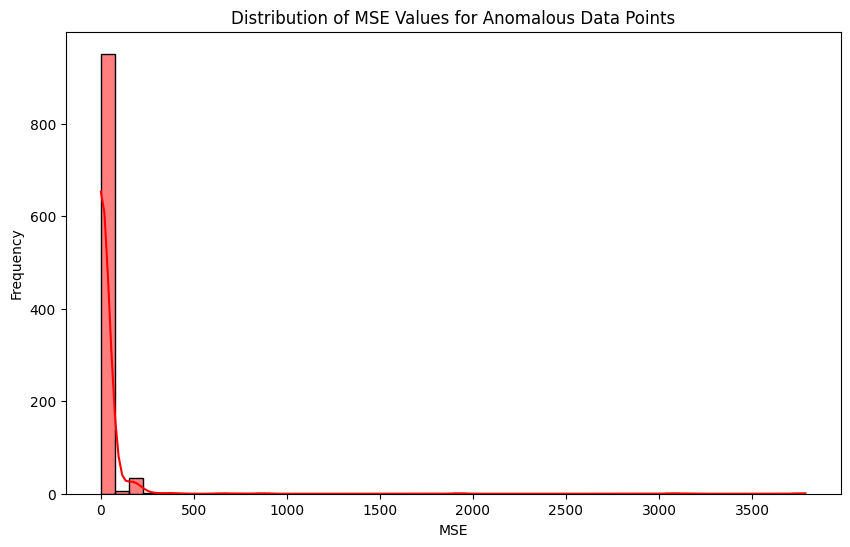

In [48]:
# Plot distribution of MSE values for anomalous data points
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Anomaly'] == 1]['MSE'], bins=50, kde=True, color='red')
plt.title('Distribution of MSE Values for Anomalous Data Points')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.show()

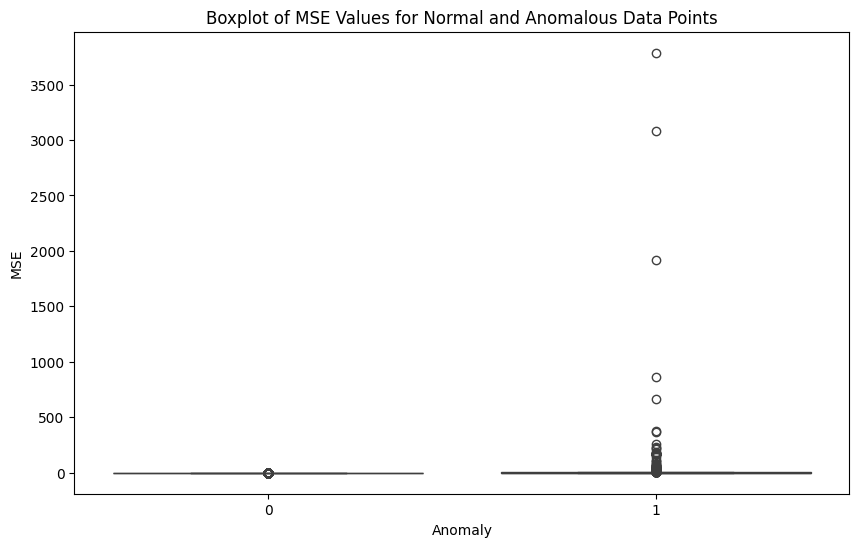

In [49]:
# Boxplot comparison of normal and anomalous data MSE values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Anomaly', y='MSE', data=data)
plt.title('Boxplot of MSE Values for Normal and Anomalous Data Points')
plt.xlabel('Anomaly')
plt.ylabel('MSE')
plt.show()

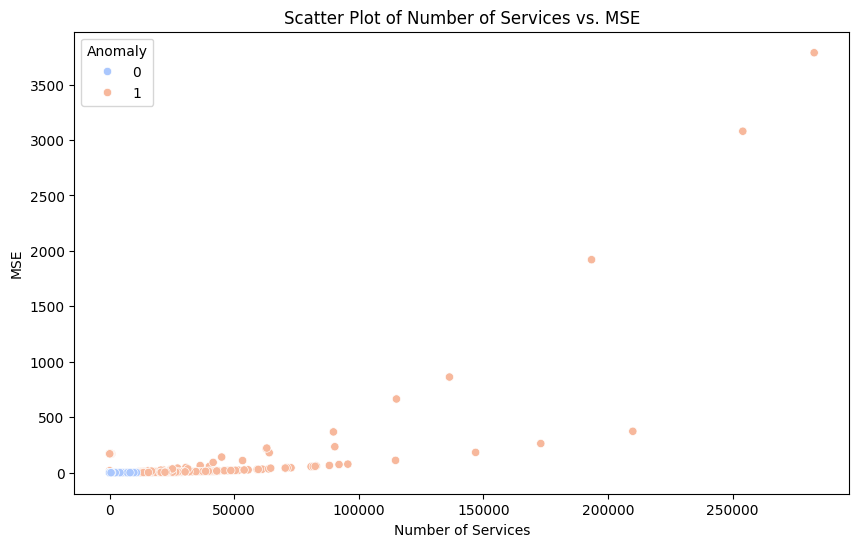

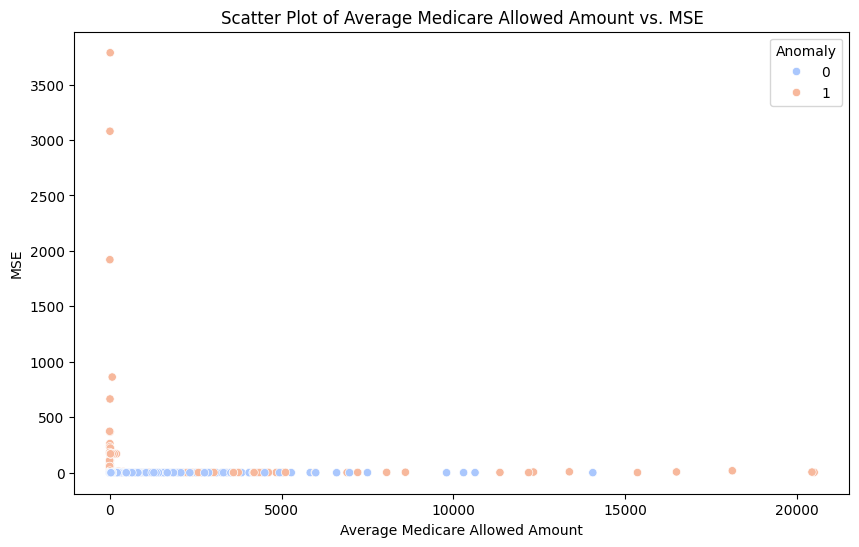

In [50]:
# Scatter Plot of MSE vs. Key Features
key_features = ['Number of Services', 'Average Medicare Allowed Amount']
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='MSE', data=data, hue='Anomaly', palette='coolwarm')
    plt.title(f'Scatter Plot of {feature} vs. MSE')
    plt.xlabel(feature)
    plt.ylabel('MSE')
    plt.show()

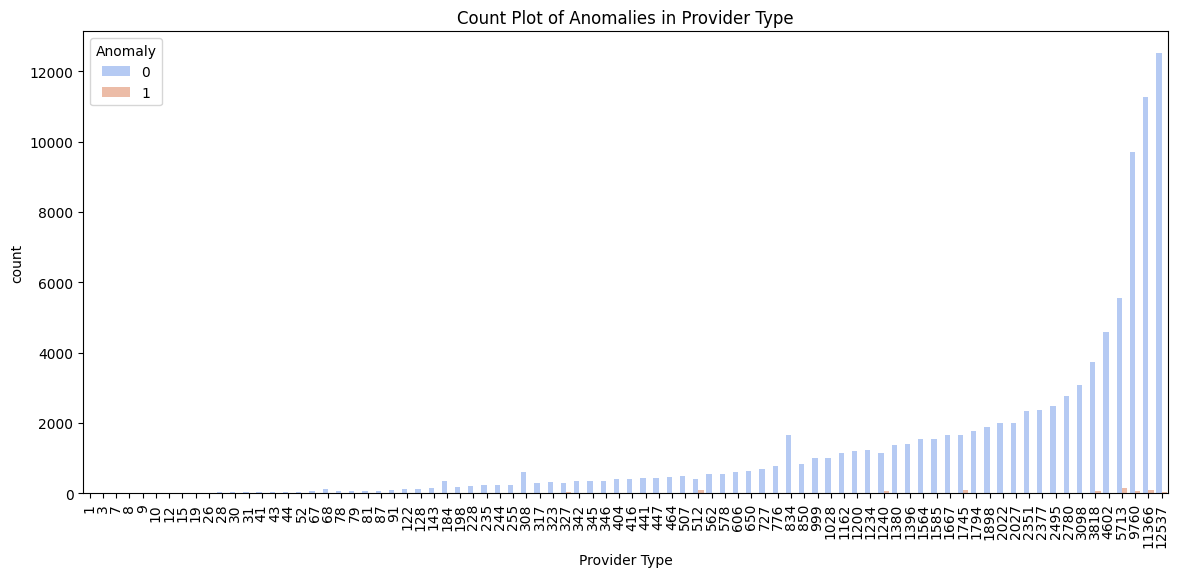

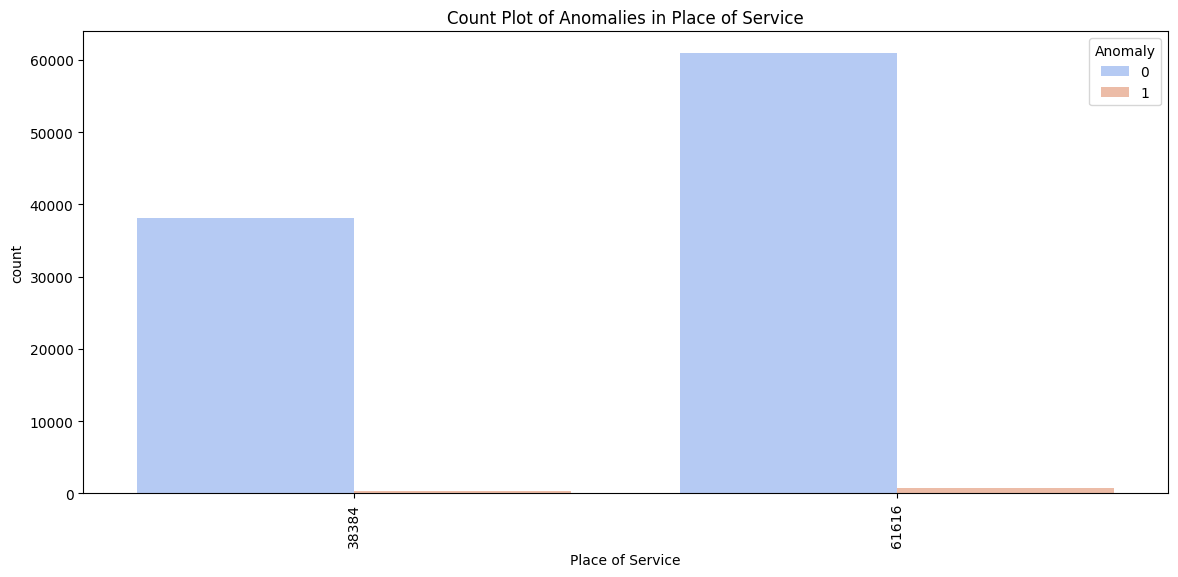

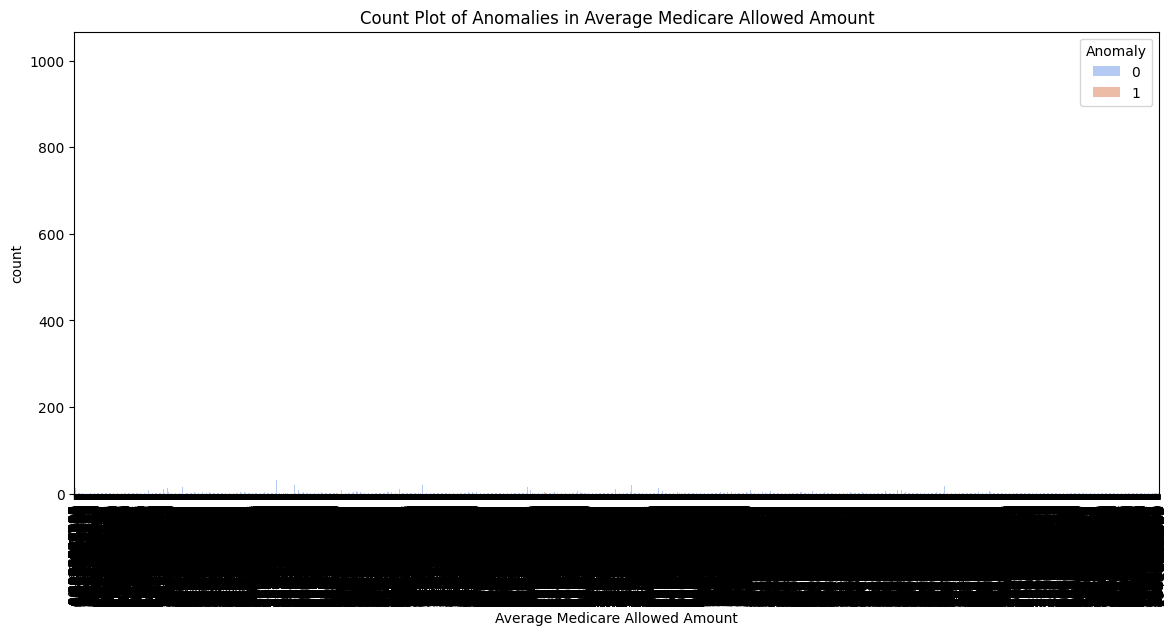

In [ ]:
# Count Plot of Anomalies in Different Categories
categorical_features = ['Provider Type', 'Place of Service', 'Average Medicare Allowed Amount',	'Average Submitted Charge Amount', 'Average Medicare Payment Amount',	'Average Medicare Standardized Amount']
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, hue='Anomaly', data=data, palette='coolwarm')
    plt.title(f'Count Plot of Anomalies in {feature}')
    plt.xticks(rotation=90)
    plt.show()